In [3]:
import pandas as pd
from io import StringIO
import numpy as np


csv_data = '''A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
10.0,11.0,12.0,'''
df = pd.read_csv(StringIO(csv_data))
print(df)
print(df.isnull().sum())

      A     B     C    D
0   1.0   2.0   3.0  4.0
1   5.0   6.0   NaN  8.0
2  10.0  11.0  12.0  NaN
A    0
B    0
C    1
D    1
dtype: int64


A has 0, B has 0, c has 1, and D has 1 missing values.



Excersise 1.1

In [4]:
df.loc[3] = [np.nan, 7, np.nan, 5]
print("\nModified DataFrame:\n", df)
print("\nMissing values after modification:\n", df.isnull().sum())


Modified DataFrame:
       A     B     C    D
0   1.0   2.0   3.0  4.0
1   5.0   6.0   NaN  8.0
2  10.0  11.0  12.0  NaN
3   NaN   7.0   NaN  5.0

Missing values after modification:
 A    1
B    0
C    2
D    1
dtype: int64


Exercise 1.2

In [5]:
print("\nDrop rows with any missing values:\n", df.dropna(axis=0))
print("\nDrop columns with any missing values:\n", df.dropna(axis=1))
print("\nDrop rows where all values are missing:\n", df.dropna(how='all'))
print("\nDrop rows with fewer than 4 non-missing values:\n", df.dropna(thresh=4))
print("\nDrop rows where column 'C' is missing:\n", df.dropna(subset=['C']))


Drop rows with any missing values:
      A    B    C    D
0  1.0  2.0  3.0  4.0

Drop columns with any missing values:
       B
0   2.0
1   6.0
2  11.0
3   7.0

Drop rows where all values are missing:
       A     B     C    D
0   1.0   2.0   3.0  4.0
1   5.0   6.0   NaN  8.0
2  10.0  11.0  12.0  NaN
3   NaN   7.0   NaN  5.0

Drop rows with fewer than 4 non-missing values:
      A    B    C    D
0  1.0  2.0  3.0  4.0

Drop rows where column 'C' is missing:
       A     B     C    D
0   1.0   2.0   3.0  4.0
2  10.0  11.0  12.0  NaN


Exercise 1.3

In [6]:
from sklearn.impute import SimpleImputer
imr = SimpleImputer(missing_values=np.nan, strategy='mean')
imr = imr.fit(df.values)
imputed_data = imr.transform(df.values)
print("\nImputed Data (mean strategy):\n", imputed_data)



Imputed Data (mean strategy):
 [[ 1.          2.          3.          4.        ]
 [ 5.          6.          7.5         8.        ]
 [10.         11.         12.          5.66666667]
 [ 5.33333333  7.          7.5         5.        ]]


In [8]:
# Try 'median'
imr_median = SimpleImputer(strategy='median')
print("\nImputed Data (median strategy):\n", imr_median.fit_transform(df.values))



Imputed Data (median strategy):
 [[ 1.   2.   3.   4. ]
 [ 5.   6.   7.5  8. ]
 [10.  11.  12.   5. ]
 [ 5.   7.   7.5  5. ]]


In [7]:
# Try 'most_frequent'
imr_freq = SimpleImputer(strategy='most_frequent')
print("\nImputed Data (most_frequent strategy):\n", imr_freq.fit_transform(df.values))



Imputed Data (most_frequent strategy):
 [[ 1.  2.  3.  4.]
 [ 5.  6.  3.  8.]
 [10. 11. 12.  4.]
 [ 1.  7.  3.  5.]]


Section 2 

In [9]:
print("\n=== Section 2: Handling Categorical Data ===")

df_cat = pd.DataFrame([
    ['green', 'M', 10.1, 'class2'],
    ['red', 'L', 13.5, 'class1'],
    ['blue', 'XL', 15.3, 'class2'],
    ['yellow', 'S', 8.7, 'class1']
])
df_cat.columns = ['color', 'size', 'price', 'classlabel']



=== Section 2: Handling Categorical Data ===


In [10]:
size_mapping = {'S':0, 'M':1, 'L':2, 'XL':3}
df_cat['size'] = df_cat['size'].map(size_mapping)
print("\nOrdinal Mapping:\n", df_cat)


Ordinal Mapping:
     color  size  price classlabel
0   green     1   10.1     class2
1     red     2   13.5     class1
2    blue     3   15.3     class2
3  yellow     0    8.7     class1


In [11]:
# Inverse mapping
inv_size_mapping = {v:k for k,v in size_mapping.items()}
print("\nInverse Mapping:\n", df_cat['size'].map(inv_size_mapping))


Inverse Mapping:
 0     M
1     L
2    XL
3     S
Name: size, dtype: object


Exercise 2.2

In [ ]:
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
y = class_le.fit_transform(df_cat['classlabel'].values)
print("\nEncoded Class Labels:\n", y)
print("Inverse Transform:\n", class_le.inverse_transform(y))

Exercise 2.3

In [13]:
from sklearn.preprocessing import LabelEncoder


X = df_cat[['color', 'size', 'price']].values
color_le = LabelEncoder()
X[:,0] = color_le.fit_transform(X[:,0])
print("\nLabel Encoded Features:\n", X)

from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
print("\nOne-Hot Encoding on color:\n", ohe.fit_transform(X[:,[0]]).toarray())

print("\nPandas get_dummies:\n", pd.get_dummies(df_cat[['price','color','size']], drop_first=True))



Label Encoded Features:
 [[1 1 10.1]
 [2 2 13.5]
 [0 3 15.3]
 [3 0 8.7]]

One-Hot Encoding on color:
 [[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]]

Pandas get_dummies:
    price  size  color_green  color_red  color_yellow
0   10.1     1         True      False         False
1   13.5     2        False       True         False
2   15.3     3        False      False         False
3    8.7     0        False      False          True


Section 3 

In [14]:
print("\n=== Section 3: Partitioning Dataset ===")

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
df_wine.columns = ['Class label','Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium',
                   'Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins',
                   'Color intensity','Hue','OD280/OD315 of diluted wines','Proline']
print(df_wine.head())

from sklearn.model_selection import train_test_split
X, y = df_wine.iloc[:,1:].values, df_wine.iloc[:,0].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0, stratify=y)
print("\nTrain shape:", X_train.shape, "Test shape:", X_test.shape)


=== Section 3: Partitioning Dataset ===
   Class label  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0            1    14.23        1.71  2.43               15.6        127   
1            1    13.20        1.78  2.14               11.2        100   
2            1    13.16        2.36  2.67               18.6        101   
3            1    14.37        1.95  2.50               16.8        113   
4            1    13.24        2.59  2.87               21.0        118   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color intensity   Hue  OD280/OD315 of diluted wines  Proline  
0             5

Section 4

In [15]:
print("\n=== Section 4: Feature Scaling ===")

from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Normalization
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)
print("\nFirst 2 rows after MinMax Scaling:\n", X_train_norm[:2])

# Standardization
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)
print("\nFirst 2 rows after Standardization:\n", X_train_std[:2])

print("\nMeans (approx 0):\n", X_train_std.mean(axis=0)[:5])
print("Std Dev (approx 1):\n", X_train_std.std(axis=0)[:5])


=== Section 4: Feature Scaling ===

First 2 rows after MinMax Scaling:
 [[0.12573099 0.02964427 0.65240642 0.3814433  0.2962963  0.42068966
  0.39451477 0.16981132 0.61075949 0.11634103 0.32978723 0.66300366
  0.17261056]
 [0.79239766 0.14624506 0.51336898 0.31958763 0.30864198 0.42068966
  0.44092827 0.24528302 0.36392405 0.28952043 0.73404255 0.56776557
  0.7146933 ]]

First 2 rows after Standardization:
 [[-1.45083563 -1.27985582  0.74306024 -0.49136511 -0.37078043 -0.15558334
   0.17965734 -1.20822065  1.29150989 -0.84486398 -0.74910758  0.66674895
  -0.71247369]
 [ 1.34746381 -0.75756493 -0.2118226  -0.84257574 -0.29683265 -0.15558334
   0.39838279 -0.87620839 -0.0490171  -0.00656951  0.99652401  0.29506888
   1.63245344]]

Means (approx 0):
 [-2.00387437e-15 -1.32914024e-16 -1.53711160e-15  1.23922781e-16
 -1.64187912e-16]
Std Dev (approx 1):
 [1. 1. 1. 1. 1.]


Section 5 

In [16]:
print("\n=== Section 5: Feature Selection ===")

# 5.1 L1 Regularization
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l1', C=1.0, solver='liblinear', multi_class='ovr')
lr.fit(X_train_std, y_train)
print("\nTraining accuracy:", lr.score(X_train_std, y_train))
print("Test accuracy:", lr.score(X_test_std, y_test))
print("Coefficients:\n", lr.coef_)


=== Section 5: Feature Selection ===

Training accuracy: 1.0
Test accuracy: 1.0
Coefficients:
 [[ 1.2854338   0.17336193  0.76296771 -1.26093627  0.          0.
   1.21603114  0.          0.          0.          0.          0.60445585
   2.59637522]
 [-1.52968628 -0.48605998 -1.08983401  0.58245895  0.          0.
   0.56840745  0.072968    0.08639269 -2.12187042  1.00715734  0.
  -2.32132165]
 [ 0.16163589  0.14102717  0.54382033  0.          0.          0.
  -2.43694407  0.          0.          1.80201457 -1.06376647 -0.46940921
   0.        ]]


c:\Users\talif\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\talif\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(


exercise 5.2

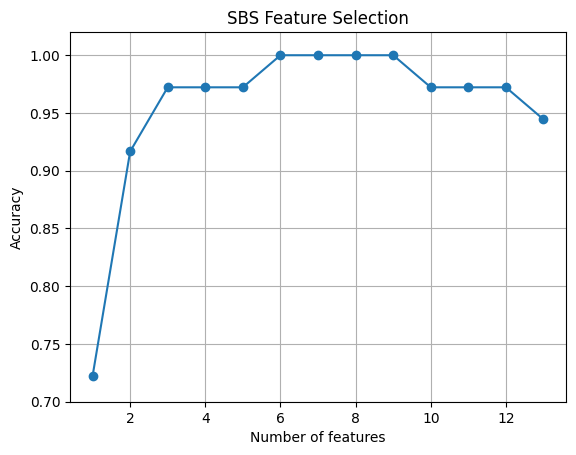

In [18]:
from sklearn.base import clone
from itertools import combinations
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


class SBS():
    def __init__(self, estimator, k_features, scoring=accuracy_score, test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state

    def fit(self, X, y):
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=self.test_size, random_state=self.random_state)
        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, X_test, y_test, self.indices_)
        self.scores_ = [score]
        
        while dim > self.k_features:
            scores = []
            subsets = []
            for p in combinations(self.indices_, r=dim-1):
                score = self._calc_score(X_train, y_train, X_test, y_test, p)
                scores.append(score)
                subsets.append(p)
            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1
            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]
        return self
    
    def transform(self, X):
        return X[:, self.indices_]
    
    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)

k_feat = [len(k) for k in sbs.subsets_]
plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.title('SBS Feature Selection')
plt.grid()
plt.show()

Exercise 5.3


Feature Importance Ranking:
 1) Proline                        0.188217
 2) Flavanoids                     0.151884
 3) Color intensity                0.150182
 4) Alcohol                        0.137097
 5) OD280/OD315 of diluted wines   0.126218
 6) Hue                            0.062428
 7) Total phenols                  0.051911
 8) Malic acid                     0.031839
 9) Magnesium                      0.028725
10) Alcalinity of ash              0.025410
11) Proanthocyanins                0.018676
12) Ash                            0.014667
13) Nonflavanoid phenols           0.012745


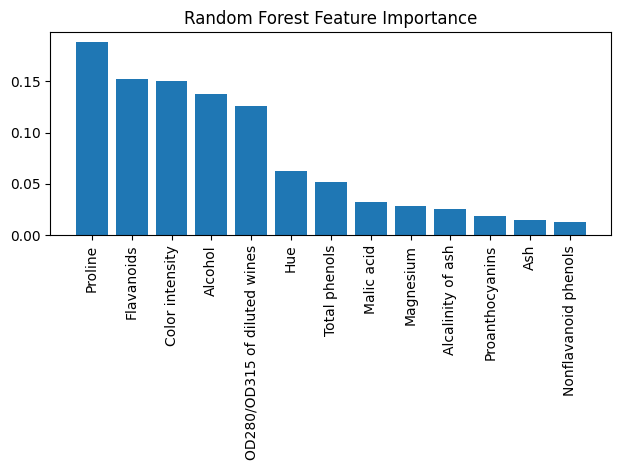

In [19]:
from sklearn.ensemble import RandomForestClassifier
feat_labels = df_wine.columns[1:]
forest = RandomForestClassifier(n_estimators=500, random_state=1)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

print("\nFeature Importance Ranking:")
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f+1, 30, feat_labels[indices[f]], importances[indices[f]]))

plt.title('Random Forest Feature Importance')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), feat_labels[indices], rotation=90)
plt.tight_layout()
plt.show()